In [103]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns

In [104]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [105]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [106]:
x = np.random.rand(500)
x[:5]

array([0.10889303, 0.27254029, 0.9178035 , 0.48122382, 0.24205616])

In [107]:
noise = np.random.randn(500)/4
noise[:5]

array([-0.18599745,  0.00621323, -0.17875654,  0.15490529, -0.08849019])

In [108]:
m = 2
c = 3 

In [109]:
# y = mx + c
y = x * m + c + noise
y[:5]

array([3.03178862, 3.55129381, 4.65685046, 4.11735292, 3.39562214])

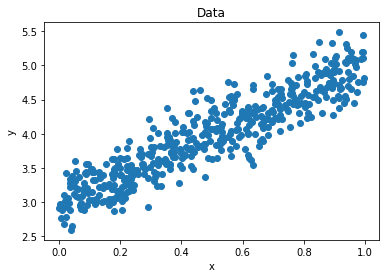

In [110]:
plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [111]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train

array([[15678168, 'Female', 41, 51000],
       [15631070, 'Female', 37, 62000],
       [15736760, 'Female', 47, 49000],
       ...,
       [15757632, 'Female', 39, 59000],
       [15595324, 'Female', 31, 68000],
       [15756932, 'Male', 25, 80000]], dtype=object)

In [112]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train[:,1] = encoder.fit_transform(X_train[:,1])
X_test[:,1]=encoder.transform(X_test[:,1] )
X_train

array([[15678168, 0, 41, 51000],
       [15631070, 0, 37, 62000],
       [15736760, 0, 47, 49000],
       ...,
       [15757632, 0, 39, 59000],
       [15595324, 0, 31, 68000],
       [15756932, 1, 25, 80000]], dtype=object)

In [113]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [114]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Accuracy score for train : ', accuracy_score(y_train, y_pred_train)*100)
print('Accuracy score for test : ', accuracy_score(y_test, y_pred_test)*100)

Accuracy score for train :  77.5
Accuracy score for test :  76.25


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


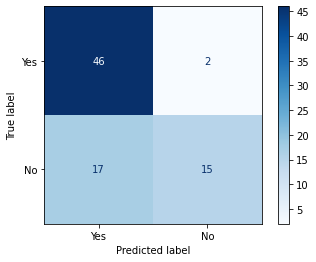

In [115]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [116]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        48
           1       0.88      0.47      0.61        32

    accuracy                           0.76        80
   macro avg       0.81      0.71      0.72        80
weighted avg       0.79      0.76      0.74        80



In [117]:
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)

GaussianNB()

In [118]:
print('GaussianNBModel Train  : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test : ' , GaussianNBModel.score(X_test, y_test))

GaussianNBModel Train  :  0.88125
GaussianNBModel Test :  0.8875


In [119]:
y_pred = GaussianNBModel.predict(X_test)
y_pred_prob = GaussianNBModel.predict_proba(X_test)
print('Predicted Value is : ' , y_pred[:10])
print('Prediction Probabilities Value is : ' , y_pred_prob[:10])

Predicted Value is :  [0 0 1 0 0 0 0 1 0 1]
Prediction Probabilities Value is :  [[0.63373748 0.36626252]
 [0.99000218 0.00999782]
 [0.04948256 0.95051744]
 [0.76140609 0.23859391]
 [0.53301933 0.46698067]
 [0.91974047 0.08025953]
 [0.90432922 0.09567078]
 [0.10910922 0.89089078]
 [0.69831909 0.30168091]
 [0.04432502 0.95567498]]


In [120]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', cm)

Confusion Matrix is : 
 [[46  2]
 [ 7 25]]


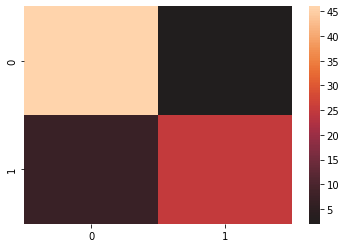

In [121]:
sns.heatmap(cm , center = True)
plt.show()

In [122]:
css_test = accuracy_score(y_test, y_pred)
print(css_test)

0.8875


In [123]:
from sklearn.naive_bayes import BernoulliNB
BernoulliNBModel = BernoulliNB(alpha=1,binarize=1)
BernoulliNBModel.fit(X_train, y_train)

BernoulliNB(alpha=1, binarize=1)

In [124]:
print('BernoulliNBModel Train is : ' , BernoulliNBModel.score(X_train, y_train))
print('BernoulliNBModel Test is : ' , BernoulliNBModel.score(X_test, y_test))

BernoulliNBModel Train is :  0.653125
BernoulliNBModel Test is :  0.6


In [125]:
y_pred = BernoulliNBModel.predict(X_test)
y_pred_prob = BernoulliNBModel.predict_proba(X_test)
print('Predicted Value is : ' , y_pred)
print('Prediction Probabilities Value is : ' , y_pred_prob)

Predicted Value is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Prediction Probabilities Value is :  [[0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [0.65686565 0.34313435]
 [

In [126]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[48  0]
 [32  0]]


In [127]:
CM = confusion_matrix(y_test, y_pred)

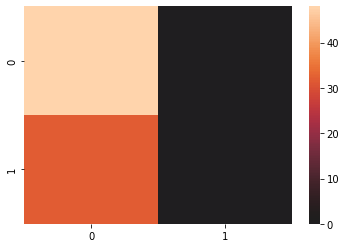

In [128]:
sns.heatmap(CM, center = True)
plt.show()

In [129]:
acc_test = accuracy_score(y_test, y_pred)
print('the accuarcy of random forest model is :')
print(acc_test)

the accuarcy of random forest model is :
0.6
